# Anomaly Detection
This chapter focusses on the possible outliers in the dataset. Three different approaches are used in detecting the possible outliers or anomalies. The three different approaches for estimating the outliers:
1. Gaussian Kernel Density
2. K-Nearest Neighbour Density
3. K-Nearest Neighbour Average Relative Density

Prior to the analysis, a normalization of the data is useful, beacause the scaling in each attribute varies much, thus a normalization will force the scaling to not vary too much. The data is standardized in the previous section where a Cluster analysis was made on the data.

In [1]:
# Relevant imports for Anomaly Detection
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from toolbox_02450 import gausKernelDensity

# Load data
df = pd.Series()
df['raw'] = pd.read_csv('./data/clean.csv',index_col=0)

# Standardize data
df['num'] = df['raw']._get_numeric_data()
df['std'] = (df['num'] - df['num'].mean()) / (df['num'].max() - df['num'].min())

## First investigation
Before going deep into an investigation on finding possible outliers, or anomalies in the data, we will analyse a dendrogram too see if there are any obvious anomalies in the data.

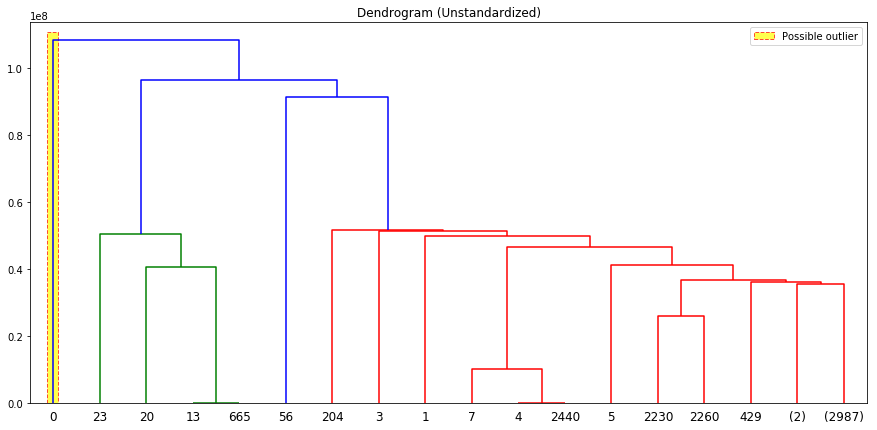

/home/mattias/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


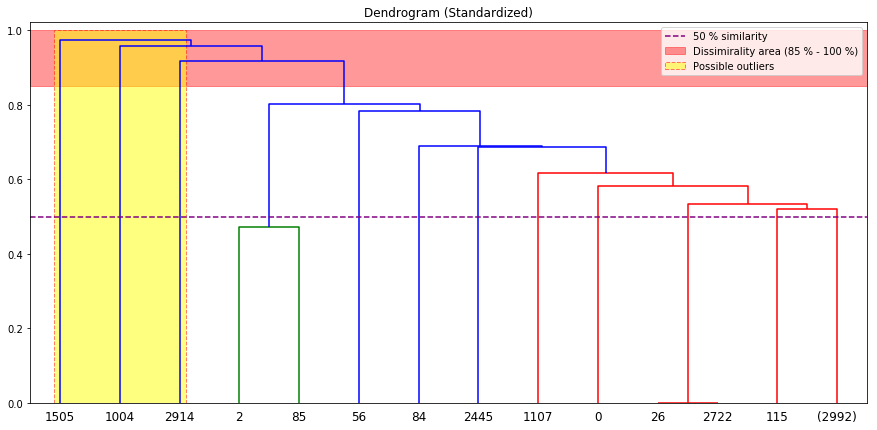

In [10]:
# Dendrogram for quick overview of possible outliers

# Imports for creating a Dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

X_num = df['num'].as_matrix()
X_std = df['std'].as_matrix()

# Perform hierarchical/agglomerative clustering on data matrix
Method = 'single'
Metric = 'euclidean'

Z_num = linkage(X_num, method=Method, metric=Metric)
Z_std = linkage(X_std, method=Method, metric=Metric)

## Display dendrograms

# Data not standardized
max_display_levels = 10
plt.figure(1,figsize=(15,7))
dendrogram(Z_num, truncate_mode='level', p=max_display_levels)
plt.title('Dendrogram (Unstandardized)')
plt.axvspan(ymin=0, xmin=3.7, ymax=0.975, xmax=6, 
            edgecolor='red', facecolor='yellow', linestyle='dashed', alpha=0.7)
plt.legend(['Possible outlier'], loc='best')
plt.show()

# Standardized data
max_display_levels = 10
plt.figure(2,figsize=(15,7))
dendrogram(Z_std, truncate_mode='level', p=max_display_levels)
plt.title('Dendrogram (Standardized)')
plt.axhline(0.5, color='purple', linestyle='dashed')
plt.axhspan(ymin=0.85, ymax=1, edgecolor='red', facecolor='red', linestyle='solid', alpha=.4)
plt.hold()
plt.axvspan(ymin=0, xmin=4, ymax=0.98, xmax=26, 
            edgecolor='red', facecolor='yellow', linestyle='dashed', alpha=0.5)
plt.legend(['50 % similarity', 'Dissimirality area (85 % - 100 %)', 'Possible outliers'], loc='upper right')
plt.show()

The dendrograms shown above is the first step in the investigation on finding possible outliers in the data. The dendrogram for the unstandardized data shows that the data point with index 0, is very dissimilar compared to the other data points with high dissimilarity. This could indicate a possible outlier.
If we focus on the dendrogram for the standardized data, we see that there are three possible outliers shown in the yellow squared area, where the x value is the indexes of the data points. A further investigation on these data points is made.

In [3]:
print('Observations from unstandardized data:\n\n0\t"Possible outlier"\n6\t"High Similarity data"\n10\t"High Similarity data"')
display(df['num'].iloc[[0, 4, 7]])
print('Observations from unstandardized data:\n\n1902\t"Possible outlier"\n1223\t"Possible outlier"\n4736\t"Possible outlier"\n3\t"High similarity data"\n97\t"High similarity data"')
display(df['std'].iloc[[1505, 1004, 2914, 2, 85]])

Observations from unstandardized data:

0	"Possible outlier"
6	"High Similarity data"
10	"High Similarity data"


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
6,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056,46055,0.0,1902.0,258000000.0,2007.0,11000.0,6.2,2.35,0
10,673.0,183.0,0.0,2000.0,15000.0,330249062.0,371639,24450,0.0,3018.0,250000000.0,2016.0,4000.0,6.9,2.35,197000


Observations from unstandardized data:

1902	"Possible outlier"
1223	"Possible outlier"
4736	"Possible outlier"
3	"High similarity data"
97	"High similarity data"


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1902,0.018952,-0.039712,-0.027698,0.267739,0.987052,0.033991,0.093701,0.981097,0.083326,0.050889,-0.049082,0.010968,0.042338,0.105543,-0.016900,-0.027005
1223,0.068213,-0.094319,-0.033133,-0.004087,0.243302,0.010756,-0.020266,0.443565,-0.032953,-0.010620,-0.002415,0.063051,0.983943,-0.154198,0.016838,-0.027005
4736,-0.168241,-0.056777,-0.040089,-0.034043,-0.012324,-0.075450,-0.064764,-0.017898,-0.009697,-0.071700,-0.134082,0.083884,-0.014823,0.053595,0.937891,-0.026182
3,0.797277,0.185544,0.916432,0.963391,0.029240,0.512612,0.612364,0.143658,-0.032953,0.506097,0.697586,0.094301,0.151827,0.274374,0.016838,0.442909
97,0.586686,0.130936,0.916432,0.963391,0.032365,0.308061,0.804026,0.104610,-0.032953,0.527957,0.397585,0.073468,0.181024,0.313335,0.016838,0.474428


Investigating the unstandardized data where the data point 0 is considered a possible outlier, it is seen that, compared to other much similar data points, data point 0 varies much from the other two data points seen, in the attributes 'cast_total_facebook_likes' and 'num_voted_users'.

When focussing on the standardized data and the observed possible outliers, we see that the outliers vary in almost every attribute, compared to two data points of which the similarity is very high.

## Gaussian Kernel Density

/home/mattias/DTU/machine_learning_and_data_mining/02450-project3/toolbox_02450.py:575: RuntimeWarning: divide by zero encountered in log
  log_density = -np.log(N-1)-M/2*np.log(2*np.pi*width)+np.log(sQ)


Optimal estimated width is: 0.001473626560037316


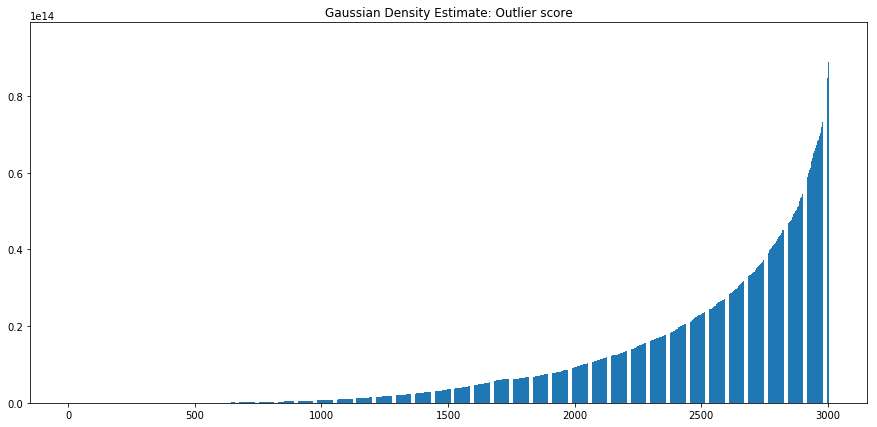

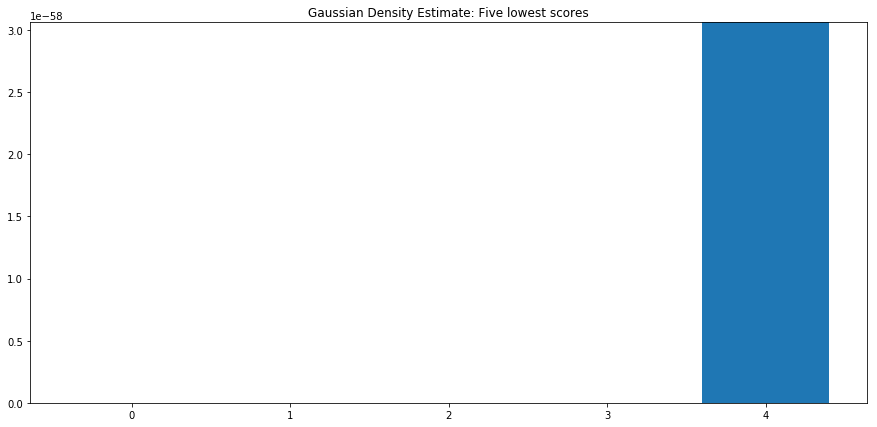

Lowest density data points:

Data point: 1505	- Density: [  2.04708238e-127]
Data point: 1004	- Density: [  2.20057038e-123]
Data point: 2914	- Density: [  1.05732446e-111]
Data point: 56		- Density: [  4.66676763e-78]
Data point: 84		- Density: [  3.06250312e-58]


In [4]:
# Imports for a Gaussian Kernel Density Estimation
from toolbox_02450 import gausKernelDensity

X = df['std'].as_matrix()

N, M = np.shape(X)

# Cross-validate kernel width by leave-one-out cross-validation
widths = X.var(axis=0).max() * (2.0**np.arange(-10,3))
logP = np.zeros(np.size(widths))
for i,w in enumerate(widths):
    density, log_density = gausKernelDensity(X,w)
    #print(i)
    logP[i] = log_density.sum()
val = logP.max()
ind = logP.argmax()

width = widths[ind]
print('Optimal estimated width is: {}'.format(width))

# evaluate density for estimated width
density, log_density = gausKernelDensity(X,width)

# Sort the densities
i = (density.argsort(axis=0)).ravel()
density = density[i]

# Plot density estimate of outlier score
plt.figure(3,figsize=(15,7))
plt.bar(range(len(density)),density[:])
plt.title('Gaussian Density Estimate: Outlier score')
plt.show()

plt.figure(4,figsize=(15,7))
plt.bar(range(5),density[:5])
plt.title('Gaussian Density Estimate: Five lowest scores')
plt.show()

# Display the index of the lowest density data object
print('Lowest density data points:\n')
print('Data point: {1}\t- Density: {0}'.format(density[0],i[0]))
print('Data point: {1}\t- Density: {0}'.format(density[1],i[1]))
print('Data point: {1}\t- Density: {0}'.format(density[2],i[2]))
print('Data point: {1}\t\t- Density: {0}'.format(density[3],i[3]))
print('Data point: {1}\t\t- Density: {0}'.format(density[4],i[4]))

## K-Nearest Neighbor Density

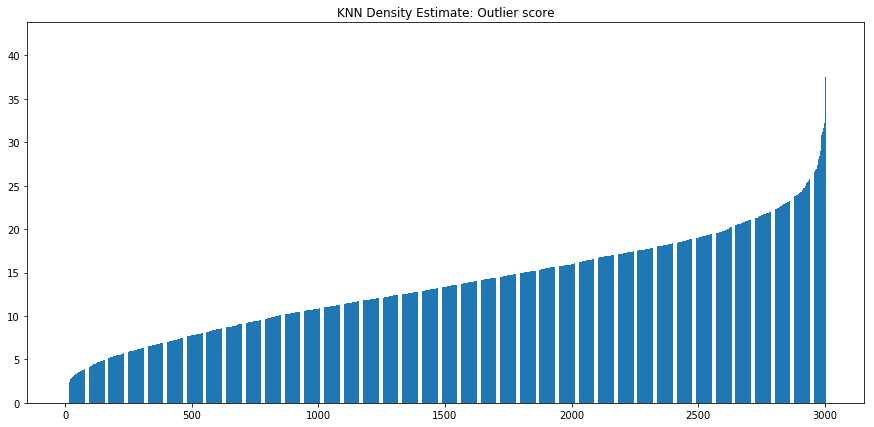

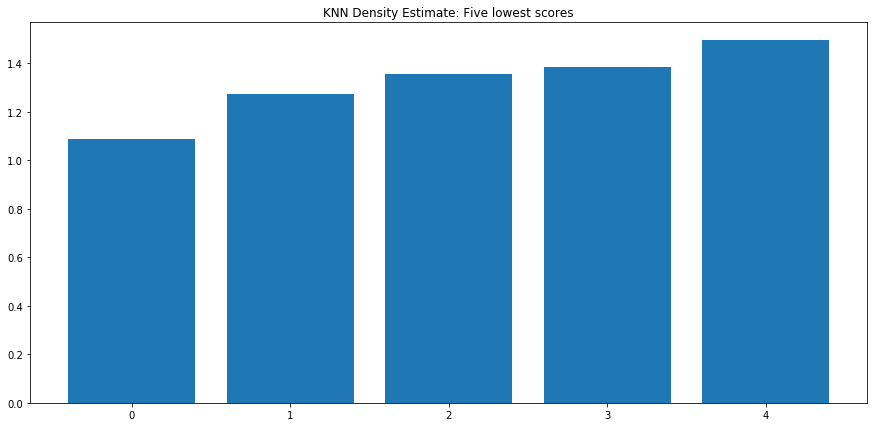

Lowest density data points:

Data point: 1505	- Density: 1.0879736761534873
Data point: 1004	- Density: 1.2738880087263613
Data point: 2914	- Density: 1.3567864868209092
Data point: 56		- Density: 1.3873402316404095
Data point: 84		- Density: 1.49512305791166


In [5]:
# Imports for K-Nearest Neighbor Density Estimation
from sklearn.neighbors import NearestNeighbors

X = df['std'].as_matrix()

# Number of neighbors
K = 5

# Find the k nearest neighbors
knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(X)

density = 1./(D.sum(axis=1)/K)

# Sort the scores
i = density.argsort()
density = density[i]

# Plot k-neighbor estimate of outlier score (distances)
plt.figure(5, figsize=(15,7))
plt.bar(range(len(density[:])),density[:])
plt.title('KNN Density Estimate: Outlier score')
plt.show()

# Plot five lowest scores
plt.figure(6, figsize=(15,7))
plt.bar(range(5),density[:5])
plt.title('KNN Density Estimate: Five lowest scores')
plt.show()

# Display the index of the lowest density data object
print('Lowest density data points:\n')
print('Data point: {1}\t- Density: {0}'.format(density[0],i[0]))
print('Data point: {1}\t- Density: {0}'.format(density[1],i[1]))
print('Data point: {1}\t- Density: {0}'.format(density[2],i[2]))
print('Data point: {1}\t\t- Density: {0}'.format(density[3],i[3]))
print('Data point: {1}\t\t- Density: {0}'.format(density[4],i[4]))

## K-Nearest Neighbor Average Relative Density

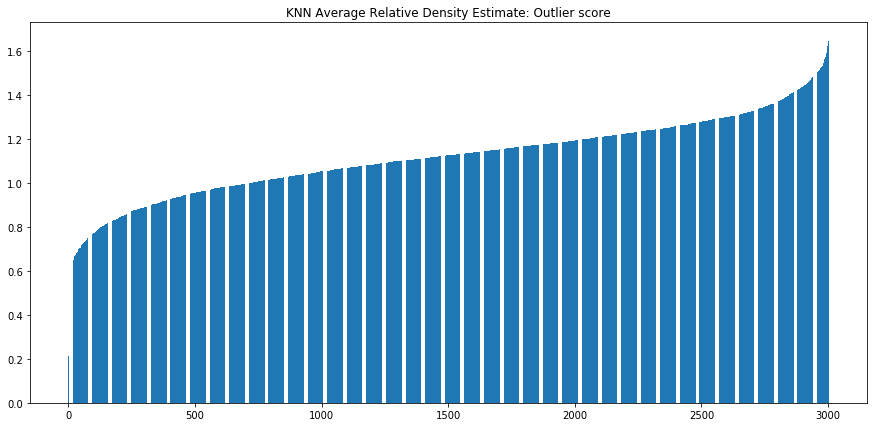

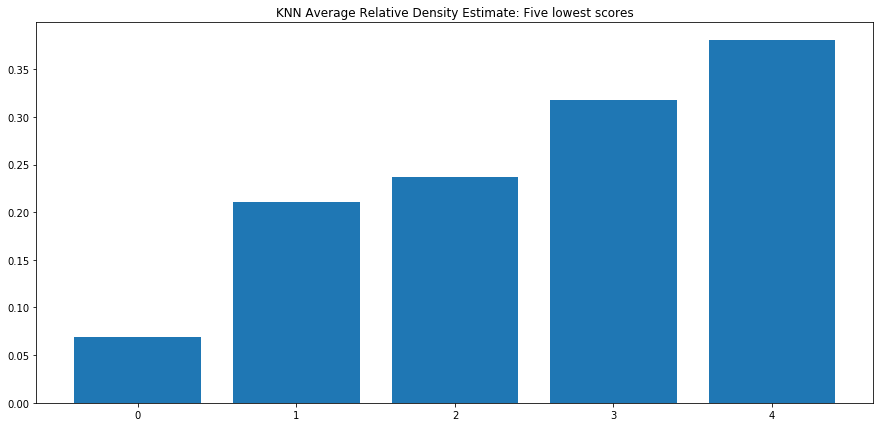

Lowest density data points:

Data point: 2914	- Density: 0.06937841156332969
Data point: 1004	- Density: 0.21107130195973328
Data point: 1505	- Density: 0.2374362707110081
Data point: 1107	- Density: 0.31787201926149594
Data point: 2167	- Density: 0.3802562284029648


In [6]:
X = df['std'].as_matrix()

# Compute the average relative density
knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(X)
density = 1./(D.sum(axis=1)/K)
avg_rel_density = density/(density[i[:,1:]].sum(axis=1)/K)

# Sort the avg.rel.densities
i_avg_rel = avg_rel_density.argsort()
avg_rel_density = avg_rel_density[i_avg_rel]

# Plot k-neighbor estimate of outlier score (distances)
plt.figure(7, figsize=(15,7))
plt.bar(range(len(avg_rel_density[:])),avg_rel_density[:])
plt.title('KNN Average Relative Density Estimate: Outlier score')
plt.show()

# Plot five lowest scores
plt.figure(8, figsize=(15,7))
plt.bar(range(5),avg_rel_density[:5])
plt.title('KNN Average Relative Density Estimate: Five lowest scores')
plt.show()

# Display the index of the lowest density data object
print('Lowest density data points:\n')
print('Data point: {1}\t- Density: {0}'.format(avg_rel_density[0],i_avg_rel[0]))
print('Data point: {1}\t- Density: {0}'.format(avg_rel_density[1],i_avg_rel[1]))
print('Data point: {1}\t- Density: {0}'.format(avg_rel_density[2],i_avg_rel[2]))
print('Data point: {1}\t- Density: {0}'.format(avg_rel_density[3],i_avg_rel[3]))
print('Data point: {1}\t- Density: {0}'.format(avg_rel_density[4],i_avg_rel[4]))